In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import pydot
import datetime
%matplotlib inline 

In [2]:
# Read CSV
df = pd.read_csv('Data/CSVForeign.csv')
plt.style.use('seaborn')
df = pd.get_dummies(df)

Text(0.5, 1.0, 'Data Visualization')

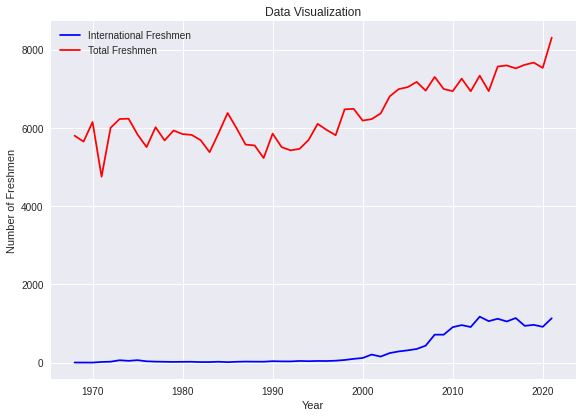

In [3]:
# Plot the initial dataset
x = np.array(df['year'])
y = np.array(df['foreign'])
z = np.array(df['total'])
  

plt.plot(x, y, 'b-', label  = 'International Freshmen', alpha = 1.0)
plt.plot(x, z, 'r-', label  = 'Total Freshmen', alpha = 1.0)
plt.legend(); plt.xticks(rotation = 'horizontal');
plt.tight_layout()
plt.xlabel('Year'); plt.ylabel('Number of Freshmen'); plt.title('Data Visualization');

In [4]:
labels = np.array(df['foreign'])
df = df.drop('foreign', axis = 1)
df_list = list(df.columns)
df = np.array(df)

In [5]:
train_df, test_df, train_labels, test_labels = train_test_split(df, labels, test_size = 0.25, random_state = 42)

In [6]:
print('Training Features Shape:', train_df.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_df.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (40, 2)
Training Labels Shape: (40,)
Testing Features Shape: (14, 2)
Testing Labels Shape: (14,)


In [7]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_df, train_labels);

RandomForestRegressor(n_estimators=1000, random_state=42)

In [8]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_df)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
pr = rf.predict([[2021, 5000]])
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')



Mean Absolute Error: 27.02 degrees.
Accuracy: 62.01 %.


In [9]:
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = df_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

Text(0.5, 1.0, 'Actual and Predicted Values')

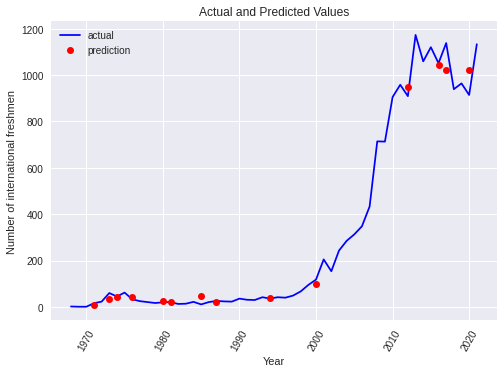

In [10]:
# Dates of training values
years = df[:, df_list.index('year')]
# List and then convert to datetime object
dates = [str(int(year)) for year in years]
dates = [datetime.datetime.strptime(date, '%Y') for date in dates]
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})
# true_data

# Dates of predictions

years = test_df[:, df_list.index('year')]

test_dates = [str(int(year)) for year in years]

test_dates = [datetime.datetime.strptime(date, '%Y') for date in test_dates]

predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})

plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')

plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()

plt.xlabel('Year'); plt.ylabel('Number of international freshmen'); plt.title('Actual and Predicted Values');

In [11]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(df, round(importance, 2)) for df, importance in zip(df_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: year                 Importance: 0.94
Variable: total                Importance: 0.06


[None, None]

Text(0.5, 1.0, 'Variable Importances')

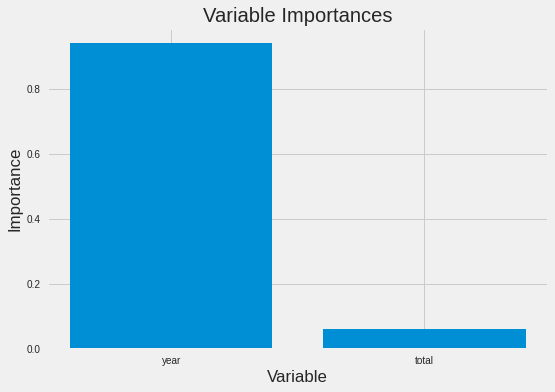

In [12]:
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, df_list, rotation='horizontal')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [13]:
# New random forest with only the most important variable -- year
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the most important variable
important_indices = [df_list.index('year')]
train_important = train_df[:, important_indices]
test_important = test_df[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 32.73 degrees.
Accuracy: 74.09 %.


In [14]:
# Pull out one tree from the forest
tree_important = rf_most_important.estimators_[10]
# Export the image to a dot file
export_graphviz(tree_important, out_file = 'tree_important.dot', feature_names = important_indices, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree_important.dot')
# Write graph to a png file
graph.write_png('tree_important.png')